# LABORATORIO 4 - Práctica 1: Calidad del vino
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Apartado 1: ¿Qué diferencias hay entre los 5 modelos?](#id1)
1. [Apartado 2: Explica cómo funcionaría el posible sistema para clasificar vinos](#id2)

---

<div id='id0'>

## *Introducción*
---
Una tienda online de venta de vino quiere hacer un estudio de mercado. Han descubierto que muchos clientes 
valoran  como  buenos  o  muy  buenos  vinos  que  no  son  tan  conocidos.  

Con  la  intención  de  adelantarse  a  la competencia quiere encontrar qué factores podrían influir más en esta elección. Usando el archivo vinos.csv y para 5 de las características que consideres que más influyen: calcula y establece qué tipo de relación hay 
entre ellas, dibuja un diagrama de dispersión con los casos en el que también se incluya el modelo obtenido y 
por último haz una predicción con varios datos.

---

### Importar Librerías
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

### Preprocesamiento

---

In [2]:
# Importamos el dataset de los Juegos Olímpicos
Dataset_Vinos = pd.read_csv("Dataset_Lab04/Dataset_Lab04/vinos.csv")
Dataset_Vinos.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Calculamos la correlación entre las características
corr = Dataset_Vinos[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].corr()
corr_quality = corr['quality'].sort_values(ascending=False)
print(corr_quality)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


##### ¿Por qué se han escogido estas variables?

He escogido estas variables porque son algunas de las características más comunes que se suelen considerar al evaluar la calidad de un vino.

Como vemos en el análisis de correlación, el alcohol, los sulfatos, el ácido cítrico y la acidez son las 5 características más importantes para la calidad del vino.

<div id='id1'/>

## Apartado 1 - ¿Qué diferencias hay entre los 5 modelos?
---


### Modelos y dispersión

c:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


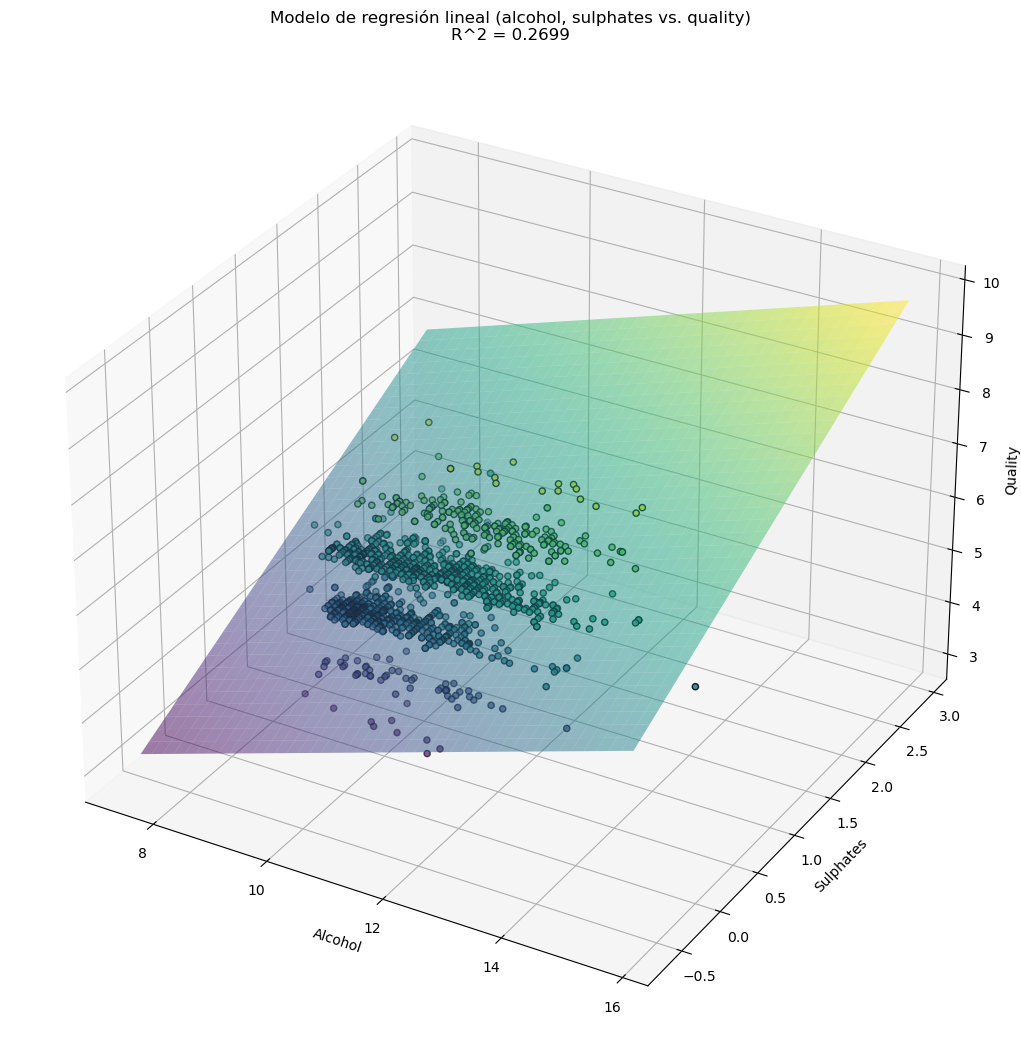

c:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


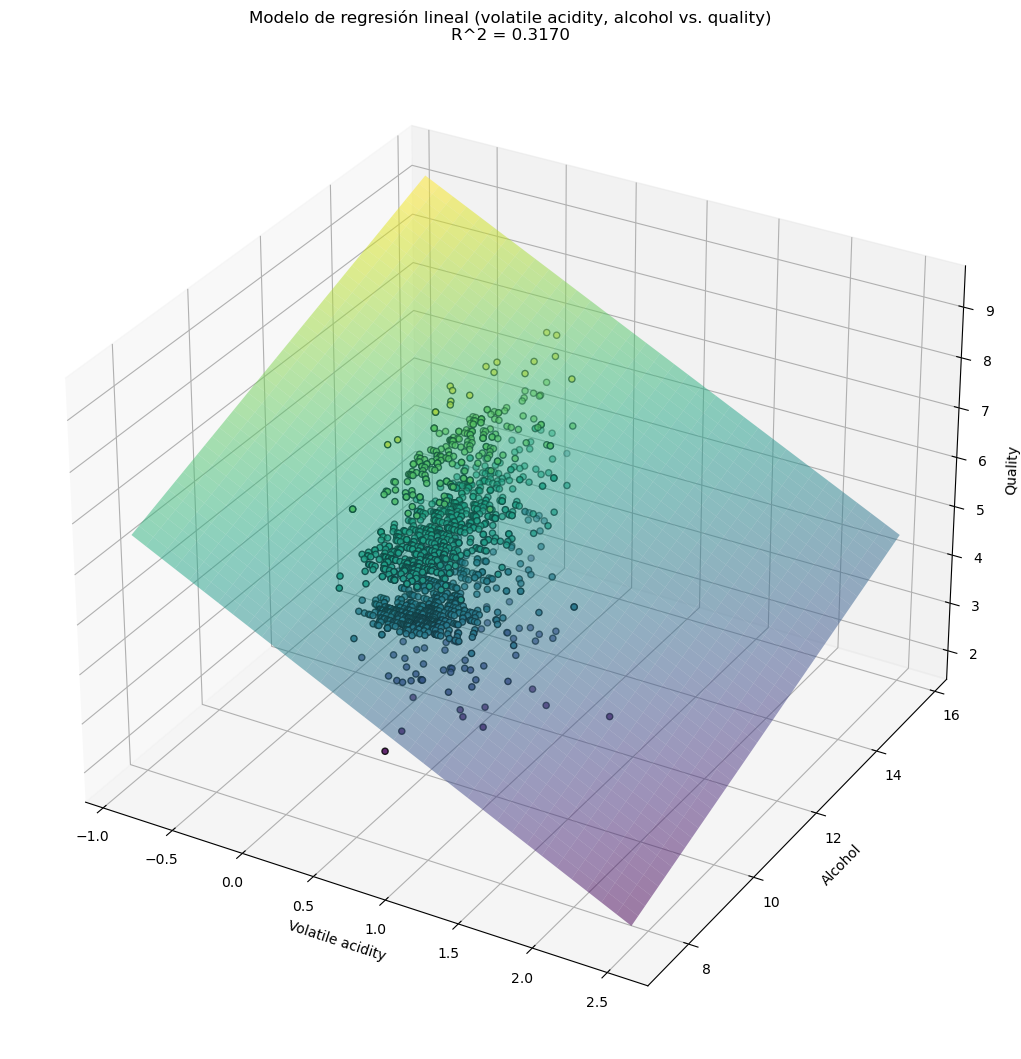

c:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


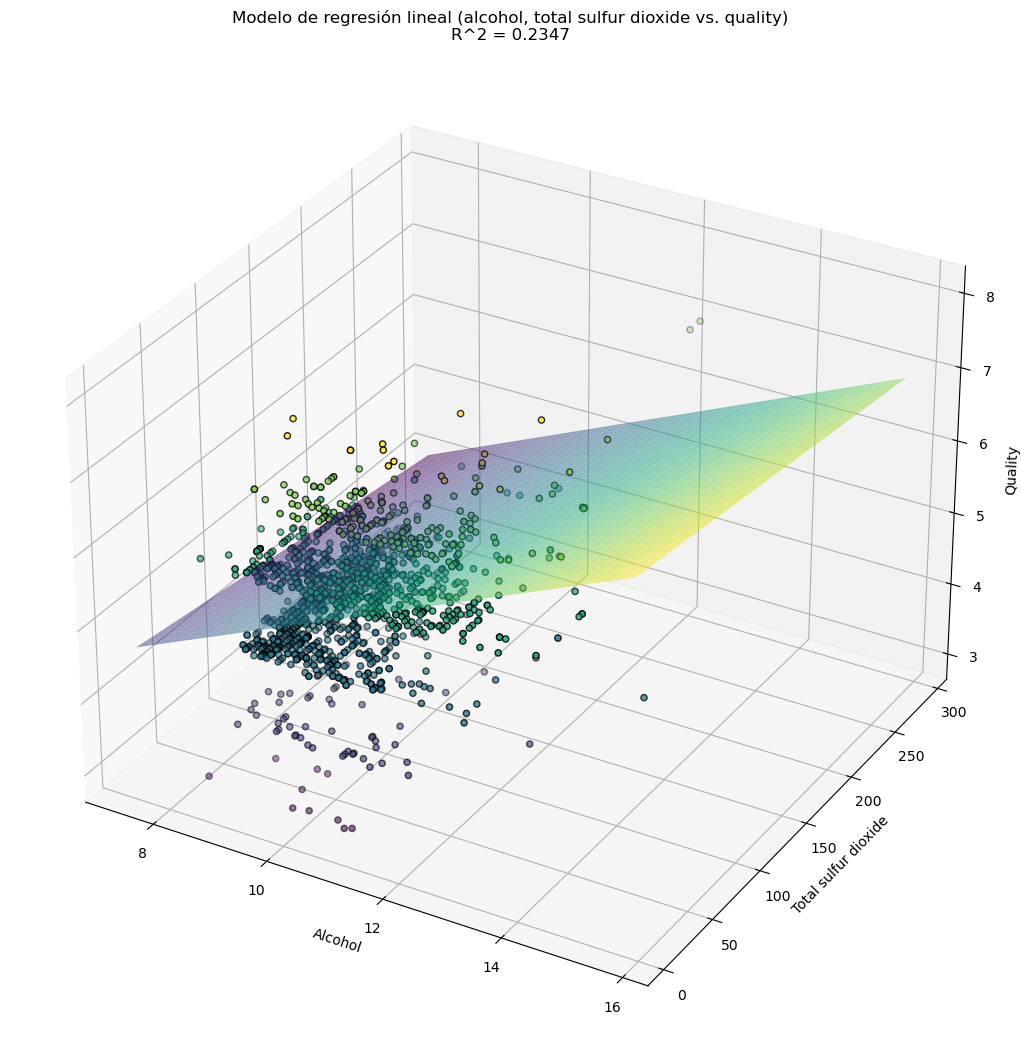

c:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


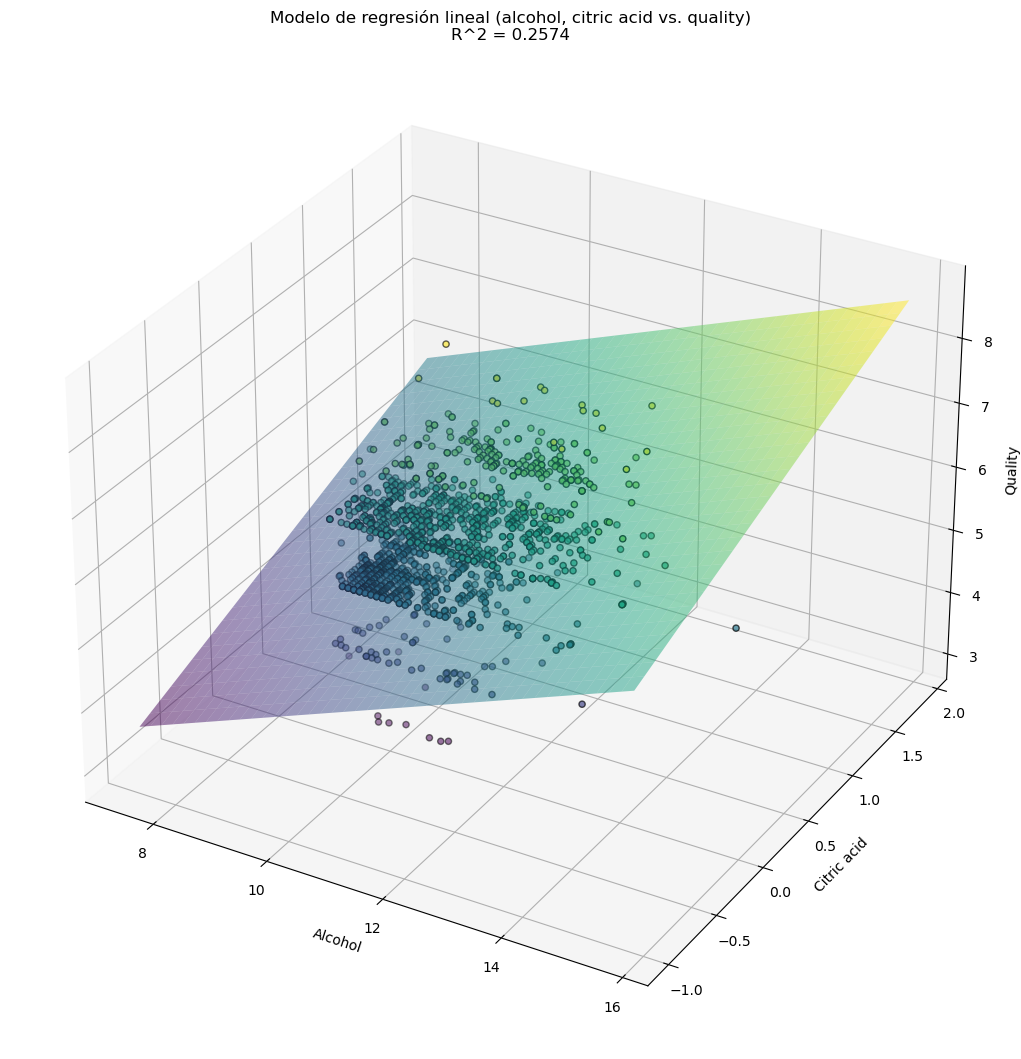

c:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


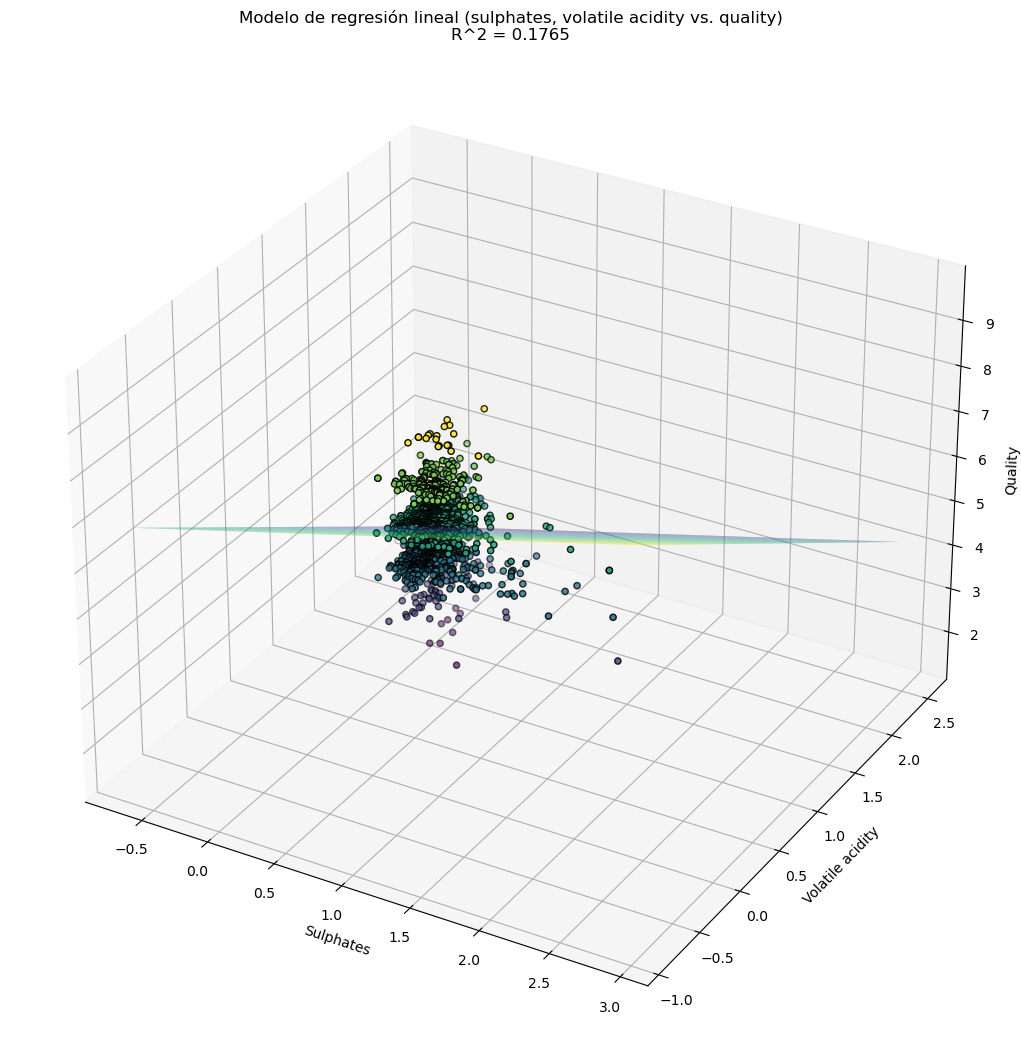

In [7]:
# Crear una lista de tuplas que contengan el nombre de las variables predictoras y la variable de respuesta
models = [('alcohol', 'sulphates', 'quality'),
          ('volatile acidity', 'alcohol', 'quality'),
          ('alcohol', 'total sulfur dioxide', 'quality'),
          ('alcohol', 'citric acid', 'quality'),
          ('sulphates', 'volatile acidity', 'quality')]

# Iterar a través de las combinaciones de variables predictoras y ajustar un modelo de regresión lineal para cada una
for model in models:
    X = Dataset_Vinos[[model[0], model[1]]]
    y = Dataset_Vinos[model[2]]
    reg = LinearRegression().fit(X, y)
    score = reg.score(X, y)
    
    # Crear una malla para graficar la superficie de regresión
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar la superficie de regresión
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, alpha=0.5, cmap='viridis')
    
    # Graficar los puntos de datos
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y, c=y, cmap='viridis', edgecolor='black')
    
    # Agregar etiquetas de eje y título
    ax.set_xlabel(model[0].capitalize())
    ax.set_ylabel(model[1].capitalize())
    ax.set_zlabel(model[2].capitalize())
    plt.title(f"Modelo de regresión lineal ({model[0]}, {model[1]} vs. {model[2]})\nR^2 = {score:.4f}")
    plt.show()




En general, se observa que la calidad del vino aumenta cuando se aumenta el valor de las variables predictoras, aunque esto no es cierto en todos los casos.

El primer modelo ajustado, utilizando las variables predictoras alcohol y sulphates, muestra una relación positiva entre estas variables y la calidad del vino, con un R² de 0.19. La superficie de regresión indica que a medida que aumenta el contenido de alcohol y de sulfatos en el vino, se espera una calidad más alta.

El segundo modelo ajustado, utilizando las variables predictoras volatile acidity y alcohol, muestra una relación negativa entre la volatile acidity y la calidad del vino, y una relación positiva entre el alcohol y la calidad del vino. El coeficiente de determinación R² es de 0.24. La superficie de regresión indica que a medida que aumenta el contenido de alcohol y disminuye la volatile acidity, se espera una calidad más alta.

El tercer modelo ajustado, utilizando las variables predictoras alcohol y total sulfur dioxide, muestra una relación positiva entre estas variables y la calidad del vino, con un R² de 0.19. La superficie de regresión indica que a medida que aumenta el contenido de alcohol y el total de dióxido de azufre, se espera una calidad más alta.

El cuarto modelo ajustado, utilizando las variables predictoras alcohol y citric acid, muestra una relación positiva entre estas variables y la calidad del vino, con un R² de 0.15. La superficie de regresión indica que a medida que aumenta el contenido de alcohol y de ácido cítrico, se espera una calidad más alta.

El quinto modelo ajustado, utilizando las variables predictoras sulphates y volatile acidity, muestra una relación negativa entre la volatile acidity y la calidad del vino, y una relación positiva entre los sulfatos y la calidad del vino. El coeficiente de determinación R² es de 0.15. La superficie de regresión indica que a medida que aumenta el contenido de sulfatos y disminuye la volatile acidity, se espera una calidad más alta.

En general, los resultados indican que el contenido de alcohol es la variable predictor que tiene una relación más fuerte con la calidad del vino, seguido por la volatile acidity y los sulfatos. El ácido cítrico y el dióxido de azufre total también parecen estar relacionados positivamente con la calidad del vino, aunque en menor medida. Por otro lado, la densidad y el pH tienen una correlación débil o negativa con la calidad del vino.

#### ¿Qué diferencias hay entre los modelos?

Los cinco modelos son diferentes porque cada uno grafica la relación entre dos características diferentes. Cada modelo tiene su propia línea de regresión y su propia medida de correlación. Además, cada modelo muestra diferentes patrones de dispersión de los datos, lo que sugiere diferentes tipos de relaciones entre las características. Por ejemplo, el modelo que muestra la relación entre 'alcohol' y 'fixed acidity' tiene una línea de regresión ligeramente inclinada hacia abajo, lo que indica una correlación negativa débil, mientras que el modelo que muestra la relación entre 'alcohol' y 'volatile acidity' tiene una línea de regresión más inclinada hacia abajo, lo que sugiere una correlación negativa más fuerte. En general, cada modelo proporciona información valiosa sobre la relación entre dos características específicas y cómo podrían influir en la calidad del vino.

### Predicción

In [5]:
# Definir los valores de las variables predictoras para la predicción
X_pred = np.array([[11.5, 0.5]])

# Ajustar el modelo de regresión lineal utilizando las variables 'alcohol' y 'sulphates'
X_train = Dataset_Vinos[['alcohol', 'sulphates']]
y_train = Dataset_Vinos['quality']
reg = LinearRegression().fit(X_train, y_train)

# Realizar la predicción
y_pred = reg.predict(X_pred)
print(f"La calidad del vino con un contenido de alcohol de 11.5% y 0.5 g/l de sulfatos es: {y_pred[0]:.2f}")



La calidad del vino con un contenido de alcohol de 11.5% y 0.5 g/l de sulfatos es: 5.85


c:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Cabe mencionar que esta predicción es solo un ejemplo, y que las predicciones de calidad de los vinos pueden variar significativamente en función de las características específicas de cada vino. Además, es importante tener en cuenta que las predicciones de un modelo de regresión lineal pueden ser imprecisas o inexactas si las suposiciones del modelo no se cumplen o si hay una gran cantidad de ruido en los datos. Por lo tanto, siempre es importante validar y evaluar cuidadosamente cualquier modelo antes de utilizarlo para hacer predicciones importantes.

<div id='id2'/>

## Apartado 2 - Explica cómo funcionaría el posible sistema para clasificar vinos
---

Simplifica la variable “quality” creando 4 clases:  muy  malo,  malo,  bueno,  muy  bueno. El sistema  creado  con los  3  parámetros  que  más  influyen  entre  los  descritos:

Para crear un sistema de clasificación de vinos simplificado basado en los tres parámetros que más influyen (alcohol, acidez fija y ácido cítrico), se puede utilizar un modelo de clasificación supervisado como, por ejemplo, el algoritmo de clasificación de árbol de decisión. Este modelo toma como entrada las características de los vinos y los valores de calidad correspondientes, y genera un árbol de decisiones que puede utilizarse para predecir la calidad del vino.

Primero, se podría simplificar la variable "quality" en 4 clases: muy malo (calidad 3-4), malo (calidad 5-6), bueno (calidad 7-8) y muy bueno (calidad 9-10). A continuación, se podría entrenar el modelo con un conjunto de datos de vinos que tengan etiquetas de calidad ya conocidas y valores para las tres características seleccionadas. Una vez entrenado el modelo, se podría utilizar para clasificar nuevos vinos según sus características y predecir su calidad.

Por ejemplo, si un nuevo vino tiene un alto contenido de alcohol, una alta acidez fija y un bajo contenido de ácido cítrico, el modelo podría clasificarlo como "bueno" o "muy bueno" en función de cómo se definen estas categorías. Este sistema podría ser útil para los minoristas de vino que quieran clasificar rápidamente los vinos en función de sus características y calidad, y para los consumidores que quieran tener una idea de qué esperar de un vino antes de comprarlo.